# Worksheet 4a-4b

NOTE:

**Mean Filter:**

- **Effect:** Reduces noise and blurs the image.
- **Operation:** Computes the average of pixel values in a defined window.
- **Use:** Suitable for images with uniform or mild noise.

**Median Filter:**

- **Effect:** Reduces noise without blurring edges.
- **Operation:** Replaces each pixel value with the median of pixel values in its window.
- **Use:** Effective in removing impulse or "salt and pepper" noise.

**Gaussian Filter:**

- **Effect:** Reduces noise and blurs the image.
- **Operation:** Applies a Gaussian kernel to weight surrounding pixels more significantly than those farther away.
- **Use:** Useful for noise reduction and blurring while maintaining a gradual transition between pixels.


## Imports

In [38]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import correlate
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import pydicom as dicom
import seaborn as sns
import pandas as pd
from sklearn import decomposition
from skimage.filters import median
from skimage.filters import gaussian

from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt

from skimage.util import img_as_ubyte, img_as_float
from mpl_toolkits.axes_grid1 import make_axes_locatable

from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 

## Filtering using correlation
- basic correlation on a gray scale image
- correlation with mode reflect
- correlation with mode constant

NameError: name 'res_img' is not defined

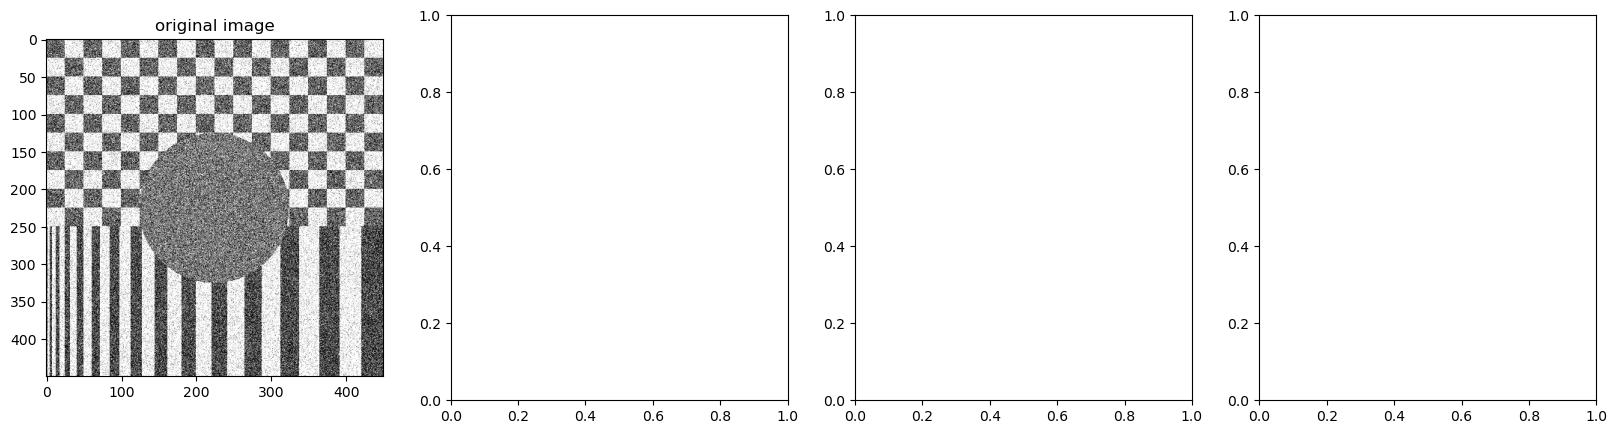

In [39]:
in_dir = "C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/exercises/ex4-ImageFiltering/data/"
im_name = "Gaussian.png"

im_org = io.imread(in_dir+im_name)
weights = [[0, 1, 0],
		   [1, 5, 1],
		   [0, 1, 0]]
           

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))
ax[0].imshow(im_org, cmap = "gray")
ax[0].set_title("original image")
ax[1].imshow(res_img, cmap = "gray")
ax[1].set_title("correlation result")
ax[2].imshow(reflection_img, cmap = "gray")
ax[2].set_title("correlation with mode = reflection")
ax[3].imshow(constant_img, cmap = "gray")
ax[3].set_title("correlation with mode = constant")

## Mean filtering

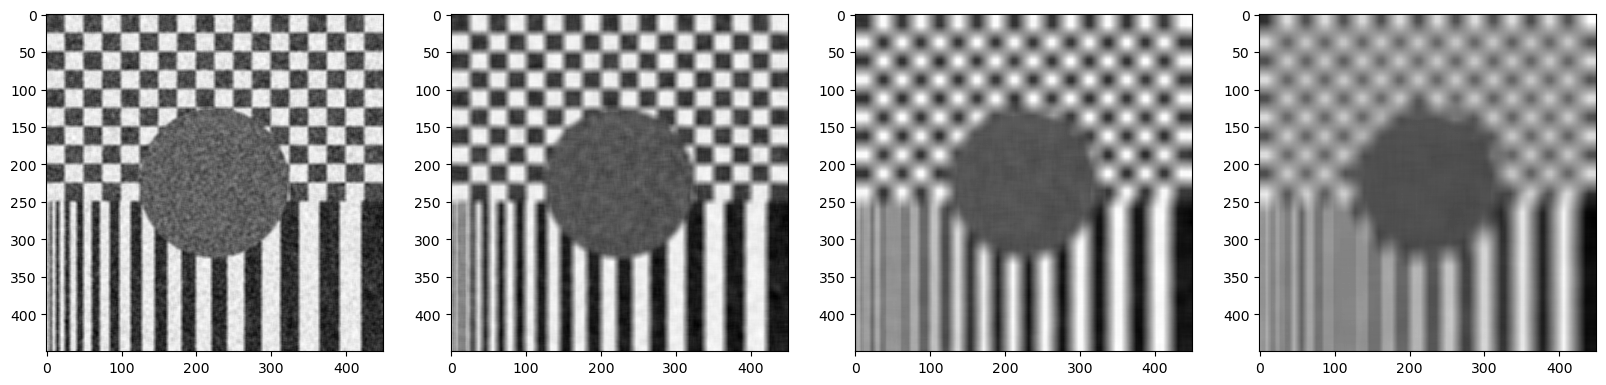

In [40]:
def apply_mean_filter(img, size):
    weights = np.ones([size, size])
    weights = weights / np.sum(weights)

    out_img = correlate(img, weights, mode='reflect')
    return out_img

gauss5 = apply_mean_filter(im_org, size = 5)
gauss10 = apply_mean_filter(im_org, size = 10)
gauss20 = apply_mean_filter(im_org, size = 20)
gauss40 = apply_mean_filter(im_org, size = 30)

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(gauss5, cmap = 'gray')
ax[1].imshow(gauss10, cmap = 'gray')
ax[2].imshow(gauss20, cmap = 'gray')
ax[3].imshow(gauss40, cmap = 'gray')
plt.show()

## Median Filtering

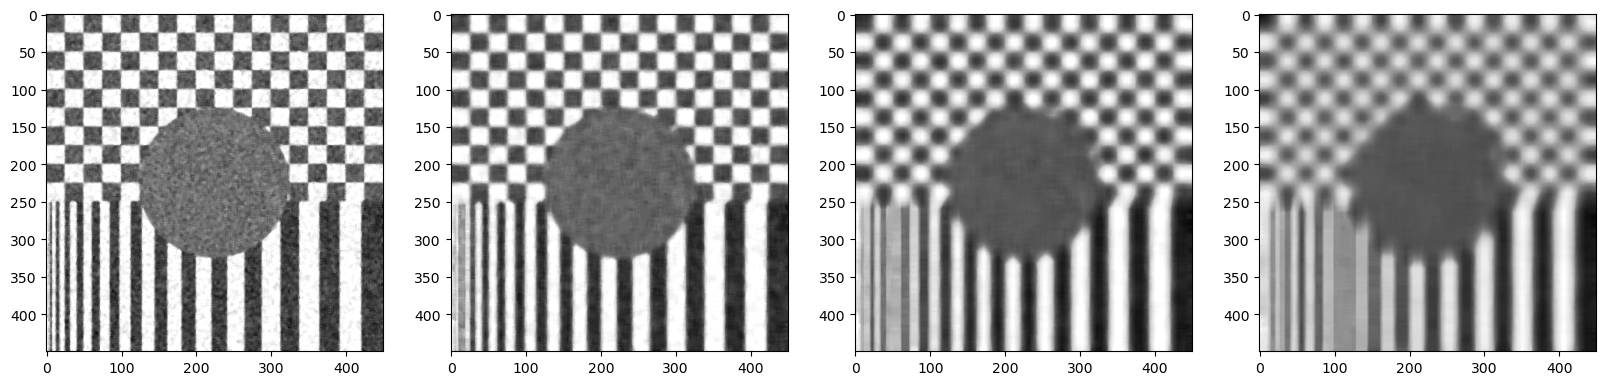

In [41]:
def apply_median_filter(img, size):
    footprint = np.ones([size, size])
    med_img = median(img, footprint)
    return med_img

median5 = apply_median_filter(im_org, size = 5)
median10 = apply_median_filter(im_org, size = 10)
median20 = apply_median_filter(im_org, size = 20)
median40 = apply_median_filter(im_org, size = 30)

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(median5, cmap = 'gray')
ax[1].imshow(median10, cmap = 'gray')
ax[2].imshow(median20, cmap = 'gray')
ax[3].imshow(median40, cmap = 'gray')
plt.show()

### Compare mean and median filtering

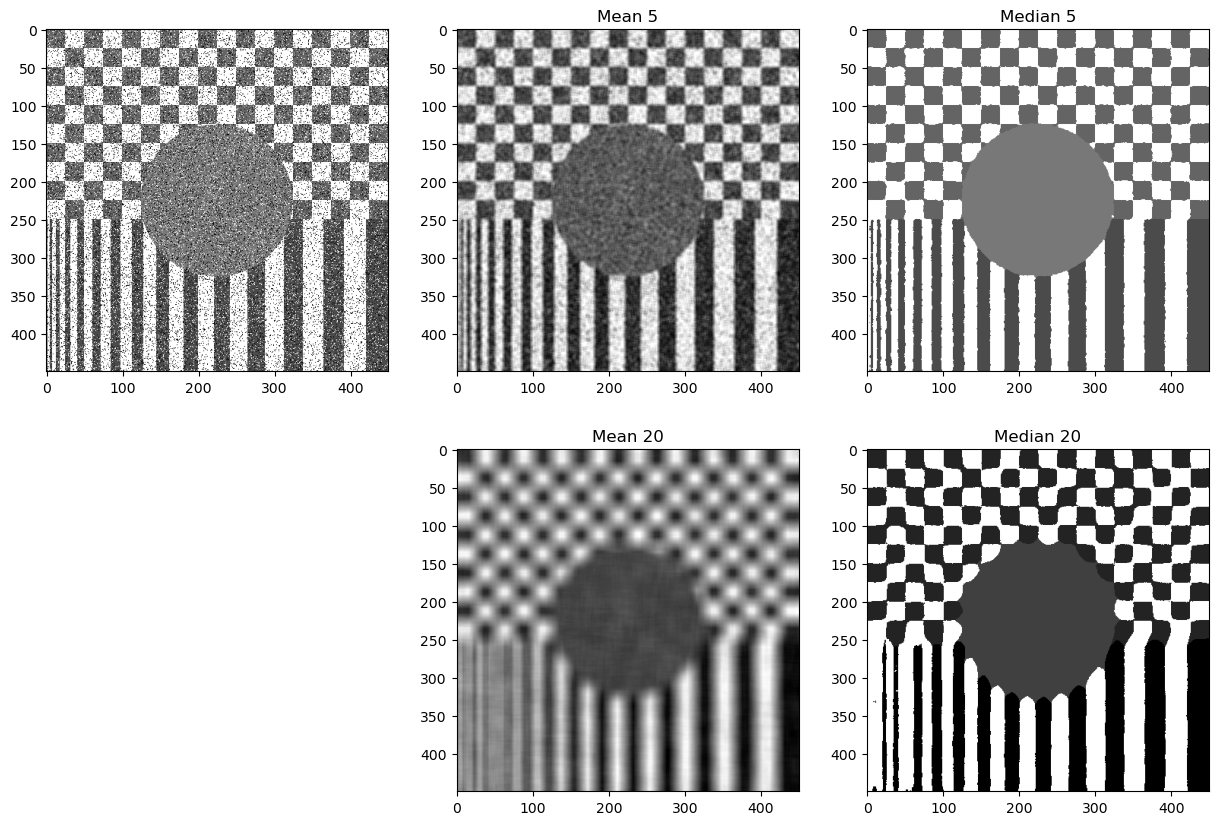

In [42]:
img_org = io.imread('C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/exercises/ex4-ImageFiltering/data/SaltPepper.png')
mean5 = apply_mean_filter(img_org, size = 5)
median5 = apply_median_filter(img_org, size = 5)
mean20 = apply_mean_filter(img_org, size =20)
median20 = apply_median_filter(img_org, size = 20)

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
ax[0,0].imshow(img_org, cmap = 'gray')
ax[0,1].imshow(mean5, cmap = 'gray')
ax[0,1].set_title('Mean 5')
ax[0,2].imshow(median5, cmap = 'gray')
ax[0,2].set_title('Median 5')
ax[1,0].set_axis_off()
ax[1,1].imshow(mean20, cmap = 'gray')
ax[1,1].set_title('Mean 20')
ax[1,2].imshow(median20, cmap = 'gray')
ax[1, 2].set_title('Median 20')
plt.show()

## Gaussian Filter

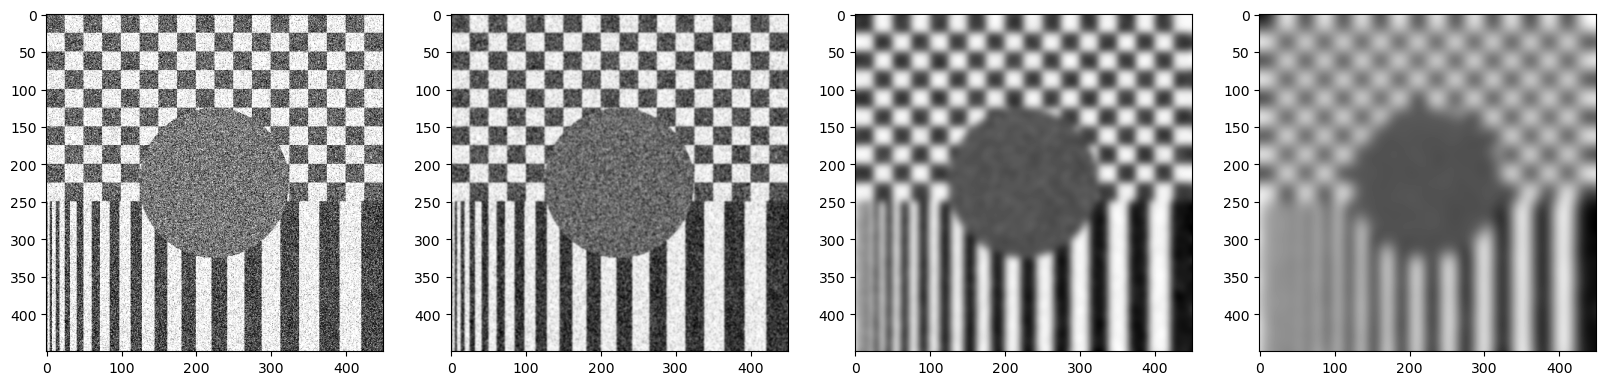

In [43]:
img_gauss = io.imread('C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/exercises/ex4-ImageFiltering/data/Gaussian.png')

gauss1 = gaussian(img_gauss, 1)
gauss5 = gaussian(img_gauss, 5)
gauss10 = gaussian(img_gauss, 10)

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(img_gauss, cmap = 'gray')
ax[1].imshow(gauss1, cmap = 'gray')
ax[2].imshow(gauss5, cmap = 'gray')
ax[3].imshow(gauss10, cmap = 'gray')
plt.show()

    


## Edge Filters
- Prewitt horizontal filter (detect changes along horizontal directions)
- Prewitt vertical filter (detect changes along vertical directions)
- Complete Prewitt filter
- Increase edges thickness

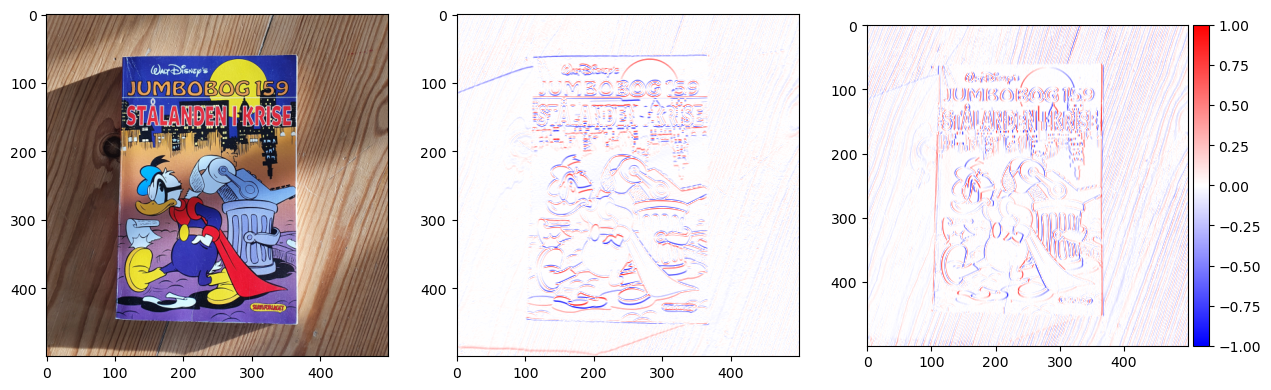

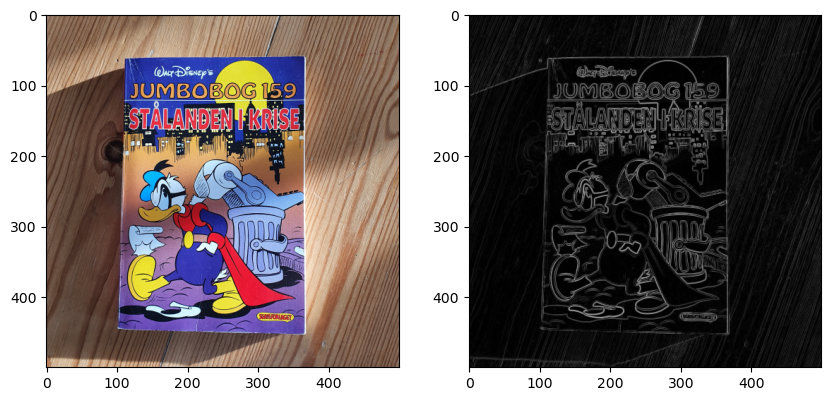

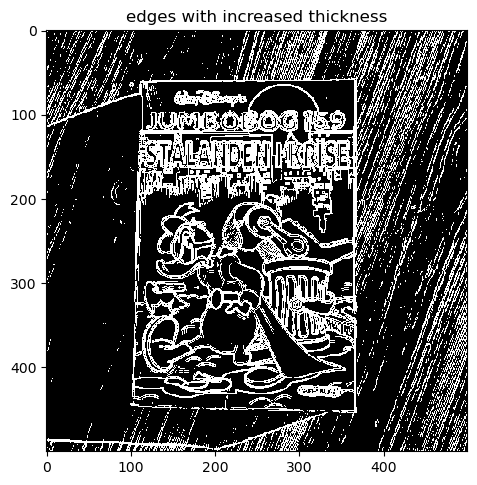

In [44]:
img_org = io.imread('C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/past exams/fall_2021/Donald/donald_1.png')
img_gray = color.rgb2gray(img_org)
img_h = prewitt_h(img_gray)
img_v = prewitt_v(img_gray)

#prewitt horizontal
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
ax[0].imshow(img_org)
ax[1].imshow(img_h, cmap = 'bwr', vmin = -1, vmax = 1)

#prewitt vertical
im = ax[2].imshow(img_v, cmap = 'bwr', vmin = -1, vmax = 1)
divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

#complete prewitt
img_prewitt = prewitt(img_gray)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
ax[0].imshow(img_org)
ax[1].imshow(img_prewitt, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

#increase edges thickness
thresh = 0.09
edges = img_prewitt > thresh
io.imshow(edges)
plt.title("edges with increased thickness")
io.show()


## Image Morphology on a single object
Morphological operations are applied to the region with "True" (for boolean images). In other words, morphological operations are applied to the white areas in the binary image.
- function to compare plots
- threshold using otsu
- erosion (shrinks the boundaries of objects in a binary image. It decreases the size of the foreground region.)
- dilation (expands the boundaries of objects in a binary image. It increases the size of the foreground region.)
- opening (erosion operation followed by a dilation operation. It is useful for removing noise and small objects from an image.)
- closing (dilation operation followed by an erosion operation. It is effective in closing small holes and gaps in the foreground.)



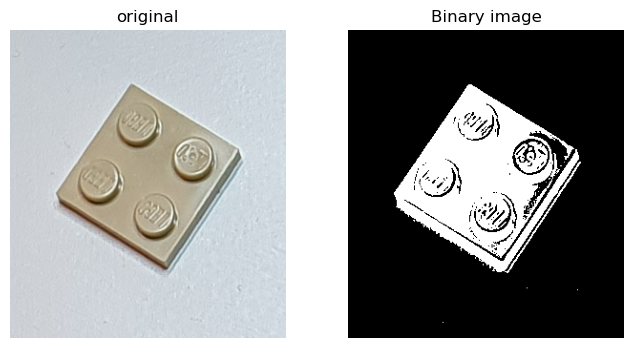

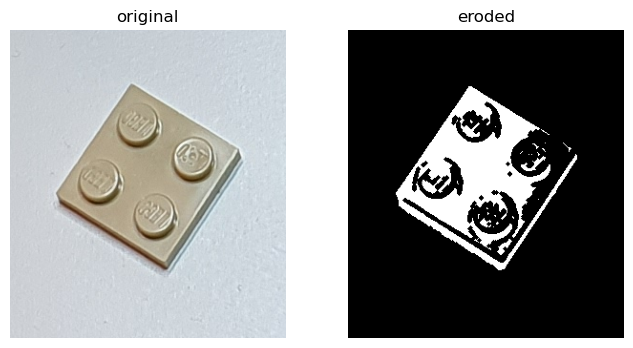

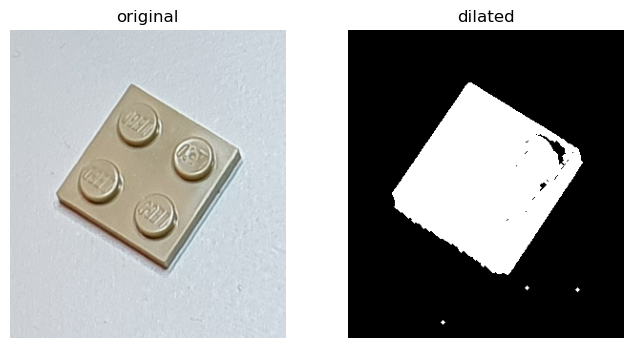

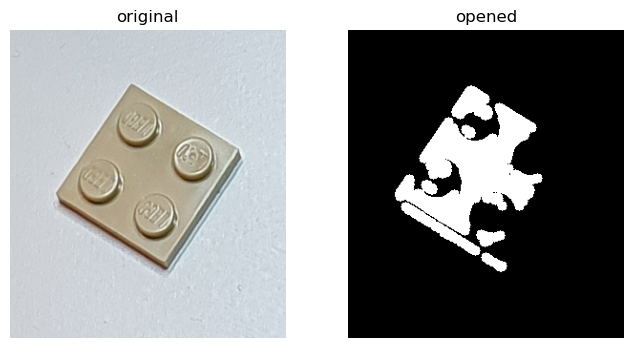

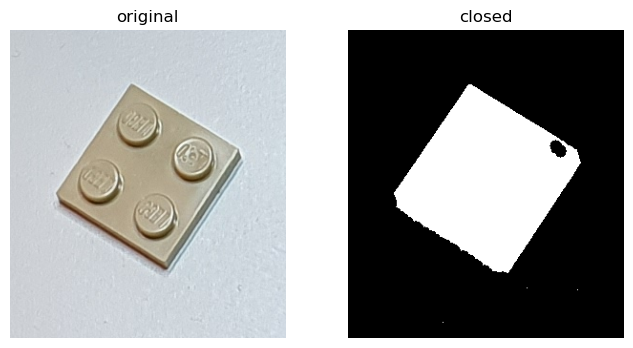

In [45]:

# From https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()



#threshold using otsu
im_org = io.imread('C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/exercises/ex4b-ImageMorphology/data/lego_5.png')
im_gray = color.rgb2gray(im_org)

thres = threshold_otsu(im_gray)
bin_img = im_gray < thres # The ROI is usually with 
plot_comparison(im_org, bin_img, 'Binary image')

#erosion (binary image is needed!!)
footprint = disk(2)
eroded = erosion(bin_img, footprint)
plot_comparison(im_org, eroded, "eroded")

#dilation
footprint = disk(2)
dilated = dilation(bin_img, footprint)
plot_comparison(im_org, dilated, "dilated")

#opening
footprint = disk(5)
opened = opening(bin_img, footprint)
plot_comparison(im_org, opened, "opened")

#closing
footprint = disk(5)
closed = closing(bin_img, footprint)
plot_comparison(im_org, closed, "closed")

## Object Outline
object outline = (opening) + closing + dilation + logical xor

- object outline on a single object
- object outline on multiple objects


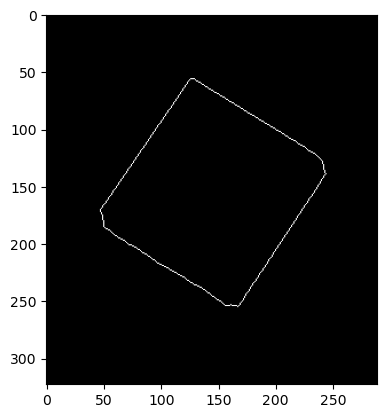

In [53]:
footprint = disk(1)
opened = opening(bin_img, disk(1))
closed = closing(opened, disk(15))
dilated = dilation(closed, disk(1))
outline = np.logical_xor(dilated, closed)
plt.imshow(outline, cmap = 'gray')
plt.show()